In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge datasets
merged_data = pd.merge(transactions, customers, on='CustomerID')
merged_data = pd.merge(merged_data, products, on='ProductID')


# Insight 1: Revenue by Region

In [12]:
# Calculate revenue by region
revenue_by_region = merged_data.groupby('Region')['TotalValue'].sum().reset_index()

# Plot
fig = px.bar(revenue_by_region, x='Region', y='TotalValue', title='Revenue by Region', labels={'TotalValue': 'Revenue ($)'})
fig.show()

#Insight 2 : Region-Wise Sales Performance Across Product Categories: A Comparative Analysis

In [26]:
region_category_sales = merged_data.groupby(['Region', 'Category'])['TotalValue'].sum().reset_index()

In [27]:
import plotly.express as px

# Grouped Bar Chart
fig = px.bar(
    region_category_sales,
    x='Region',
    y='TotalValue',
    color='Category',
    barmode='group',  # Grouped bars
    title='Region-Wise Sales Across All Categories',
    labels={'TotalValue': 'Total Sales ($)', 'Region': 'Region', 'Category': 'Product Category'}
)
fig.show()

In [28]:
# Stacked Bar Chart
fig = px.bar(
    region_category_sales,
    x='Region',
    y='TotalValue',
    color='Category',
    barmode='stack',  # Stacked bars
    title='Region-Wise Sales Across All Categories (Stacked)',
    labels={'TotalValue': 'Total Sales ($)', 'Region': 'Region', 'Category': 'Product Category'}
)
fig.show()

# Insight 3: Top-Selling Categories

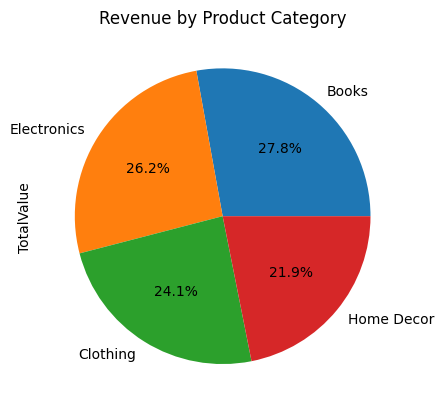

In [14]:
category_sales = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
category_sales.plot(kind='pie', autopct='%1.1f%%', title='Revenue by Product Category')
plt.show()

#Insight 4: Product Category Performance

In [25]:
# Calculate revenue and quantity sold by category
category_performance = merged_data.groupby('Category').agg({'TotalValue': 'sum', 'Quantity': 'sum'}).reset_index()

# Plot
fig = px.bar(category_performance, x='Category', y=['TotalValue', 'Quantity'], barmode='group', title='Product Category Performance', labels={'value': 'Amount', 'variable': 'Metric'})
fig.show()

# Insight 5: Sales Trends Over Time

In [15]:
# Convert TransactionDate to datetime
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])

# Calculate monthly sales
monthly_sales = merged_data.resample('M', on='TransactionDate')['TotalValue'].sum().reset_index()

# Plot
fig = px.line(monthly_sales, x='TransactionDate', y='TotalValue', title='Monthly Sales Trends', labels={'TotalValue': 'Revenue ($)'})
fig.show()

<ipython-input-15-720472d6d3a6>:5: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



#Insight 6: Repeat Purchase Behavior

In [29]:
# Calculate repeat purchase frequency
repeat_purchase_frequency = merged_data.groupby('ProductID')['TransactionID'].nunique().reset_index()
repeat_purchase_frequency.columns = ['ProductID', 'RepeatPurchaseCount']

# Merge with Products.csv to get product names
repeat_purchase_frequency = pd.merge(repeat_purchase_frequency, products, on='ProductID')

In [30]:
# Sort by RepeatPurchaseCount
top_repeated_products = repeat_purchase_frequency.sort_values(by='RepeatPurchaseCount', ascending=False).head(10)

In [33]:
import plotly.express as px

# Plot with color scale
fig = px.bar(
    top_repeated_products,
    x='ProductName',
    y='RepeatPurchaseCount',
    color='RepeatPurchaseCount',  # Color based on repeat purchase count
    color_continuous_scale='Plasma',  # Use a color scale (e.g., Viridis, Plasma, Inferno)
    title='Top Repeatedly Purchased Products',
    labels={'RepeatPurchaseCount': 'Number of Repeat Purchases', 'ProductName': 'Product Name'}
)
fig.show()

#Insight 7 : Revenue Contribution by Top 10 Customers

In [24]:
# Calculate revenue contribution by top 10 customers
top_customers = merged_data.groupby('CustomerID')['TotalValue'].sum().nlargest(10).reset_index()

# Plot
fig = px.bar(top_customers, x='CustomerID', y='TotalValue', title='Revenue Contribution by Top 10 Customers', labels={'TotalValue': 'Revenue ($)'})
fig.show()

#Insight 8 :sales trends across all quarters (Q1-Q4)

In [34]:
# Extract quarter from TransactionDate
merged_data['Quarter'] = merged_data['TransactionDate'].dt.quarter

In [35]:
# Calculate total sales by quarter
quarterly_sales = merged_data.groupby('Quarter')['TotalValue'].sum().reset_index()
quarterly_sales.columns = ['Quarter', 'TotalSales']

In [42]:


# Bar chart with color scale
fig = px.bar(
    quarterly_sales,
    x='Quarter',
    y='TotalSales',
    color='TotalSales',  # Color based on TotalSales
    color_continuous_scale='Viridis',  # Use a color scale (e.g., Viridis, Plasma, Inferno)
    title='Quarterly Sales Trends (Q1-Q4)',
    labels={'TotalSales': 'Total Sales ($)', 'Quarter': 'Quarter'}
)
fig.show()